## Bike-sharing-project By Nidhi_Kumari


## Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Importing Data Analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For changing settings for more interaction with the shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For splitting data into train, test, to encode categorical variables, to scale the features
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# For implementing linear regression
import statsmodels.api as sm

# For metric to evaluate the models
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# setting option for pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing the data and basic checks of the dataframe

In [2]:
# Reading the dataframe
df = pd.read_csv('Day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# There seems to be no missing values
# Type conversion might need to category but everything else looks fine
# As instant is just record count, we can remove it.
# As dteday data is already available for us in the form of weekday, mnth, yr, we can drop it too.
# cnt variable is an aggregate of casual and registered, so can drop them too.

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Keeping a copy for safesake
df1 = df.copy()

### Feature Engineering & Data Cleaning

In [8]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Dropping the unnecessary features
df1.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)

In [10]:
# creating categorical and continuous variable list for later
categorical_vars = ['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']
continuous_vars  = ['temp', 'atemp', 'hum', 'windspeed']

In [11]:
# Changing the type of the categorical variables to category
df1[categorical_vars] = df1[categorical_vars].astype('category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [13]:
df1.shape

(730, 12)

### Data Visualisation

In [14]:
# Creating a dataframe copy for visualisation
df2 = df1.copy()

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


### Drawing pairplots to check for linear relationship

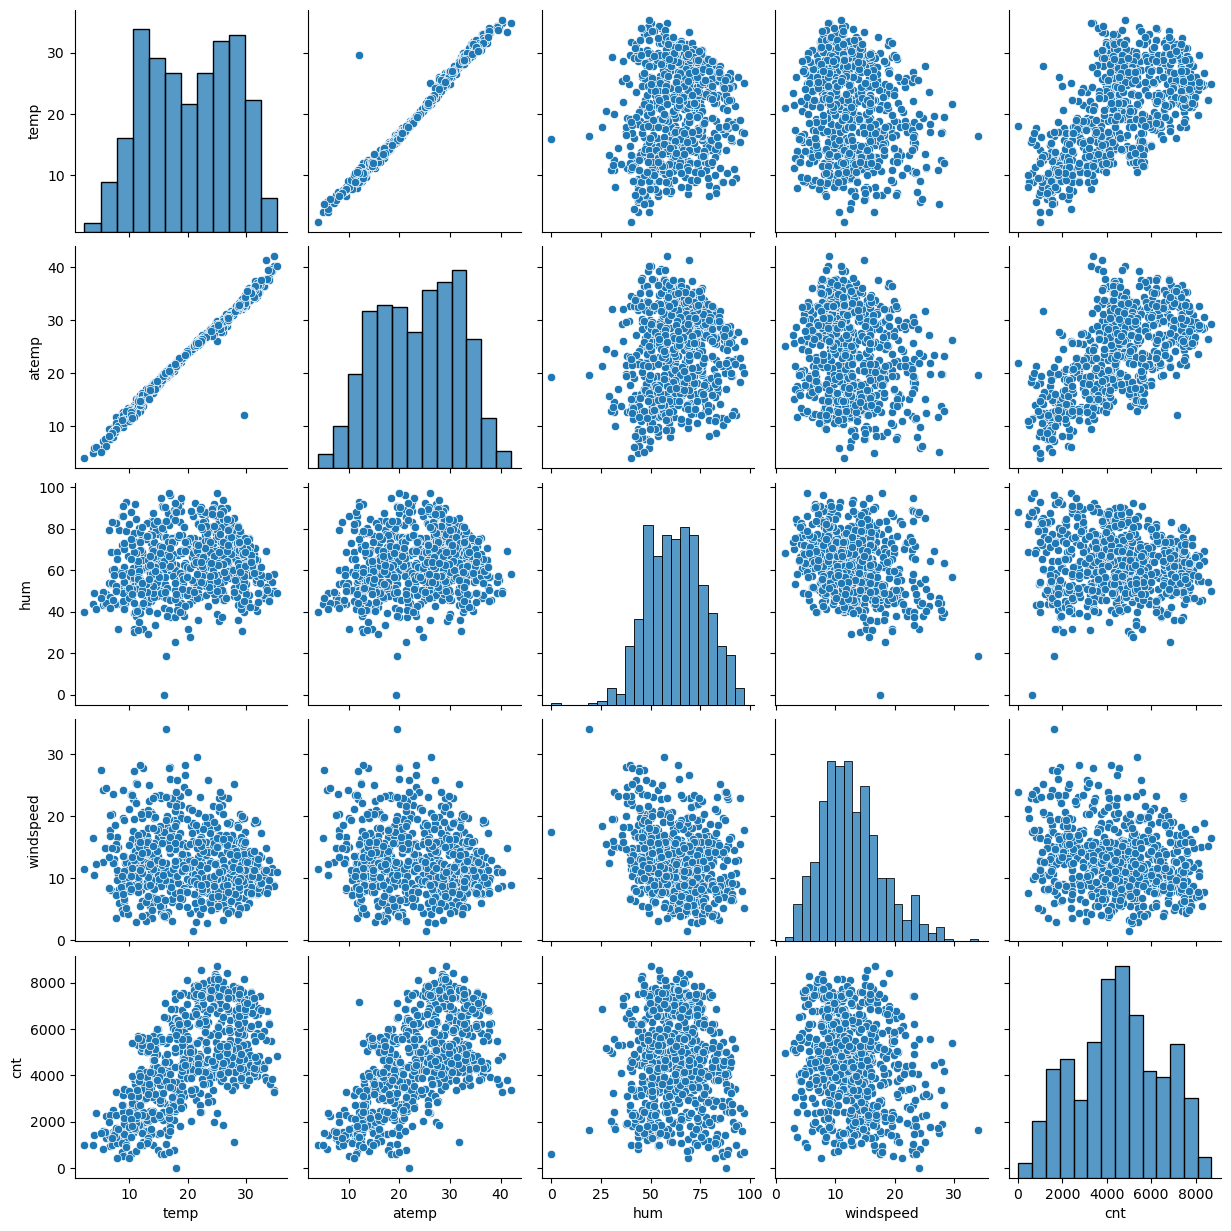

In [16]:
sns.pairplot(df2)

Variables with positive trend with target:
* atemp      -  with neither too high or too low variance. It might not be the best predictor, but it does have good linearity
* temp       -  same as temp

Variables with negative trend with target:
- windspeed  -  high variance
- hum        -  high variance
- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

In [17]:
categorical_vars, continuous_vars

(['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth'],
 ['temp', 'atemp', 'hum', 'windspeed'])

<Axes: xlabel='season', ylabel='cnt'>

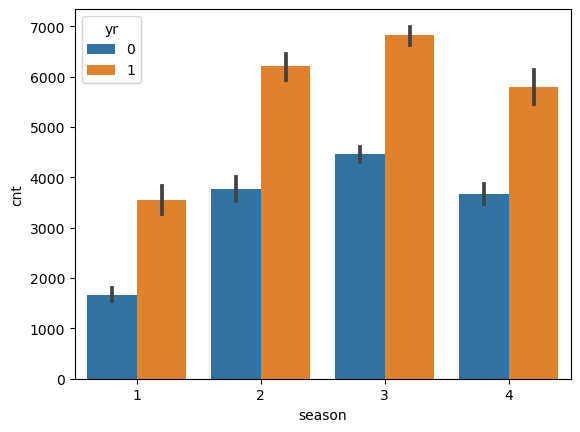

In [18]:
sns.barplot(x = df2['season'], y = df2['cnt'],hue = df2['yr'])

Fall season has the highest bookings and Spring has the lowest

There are more bookings in the year 2019 than 2018

In [21]:
categorical_vars

['season', 'weekday', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: xlabel='season', ylabel='cnt'>

<Axes: >

<Axes: xlabel='weekday', ylabel='cnt'>

<Axes: >

<Axes: xlabel='holiday', ylabel='cnt'>

<Axes: >

<Axes: xlabel='workingday', ylabel='cnt'>

<Axes: >

<Axes: xlabel='weathersit', ylabel='cnt'>

<Axes: >

<Axes: xlabel='yr', ylabel='cnt'>

<Axes: >

<Axes: xlabel='mnth', ylabel='cnt'>

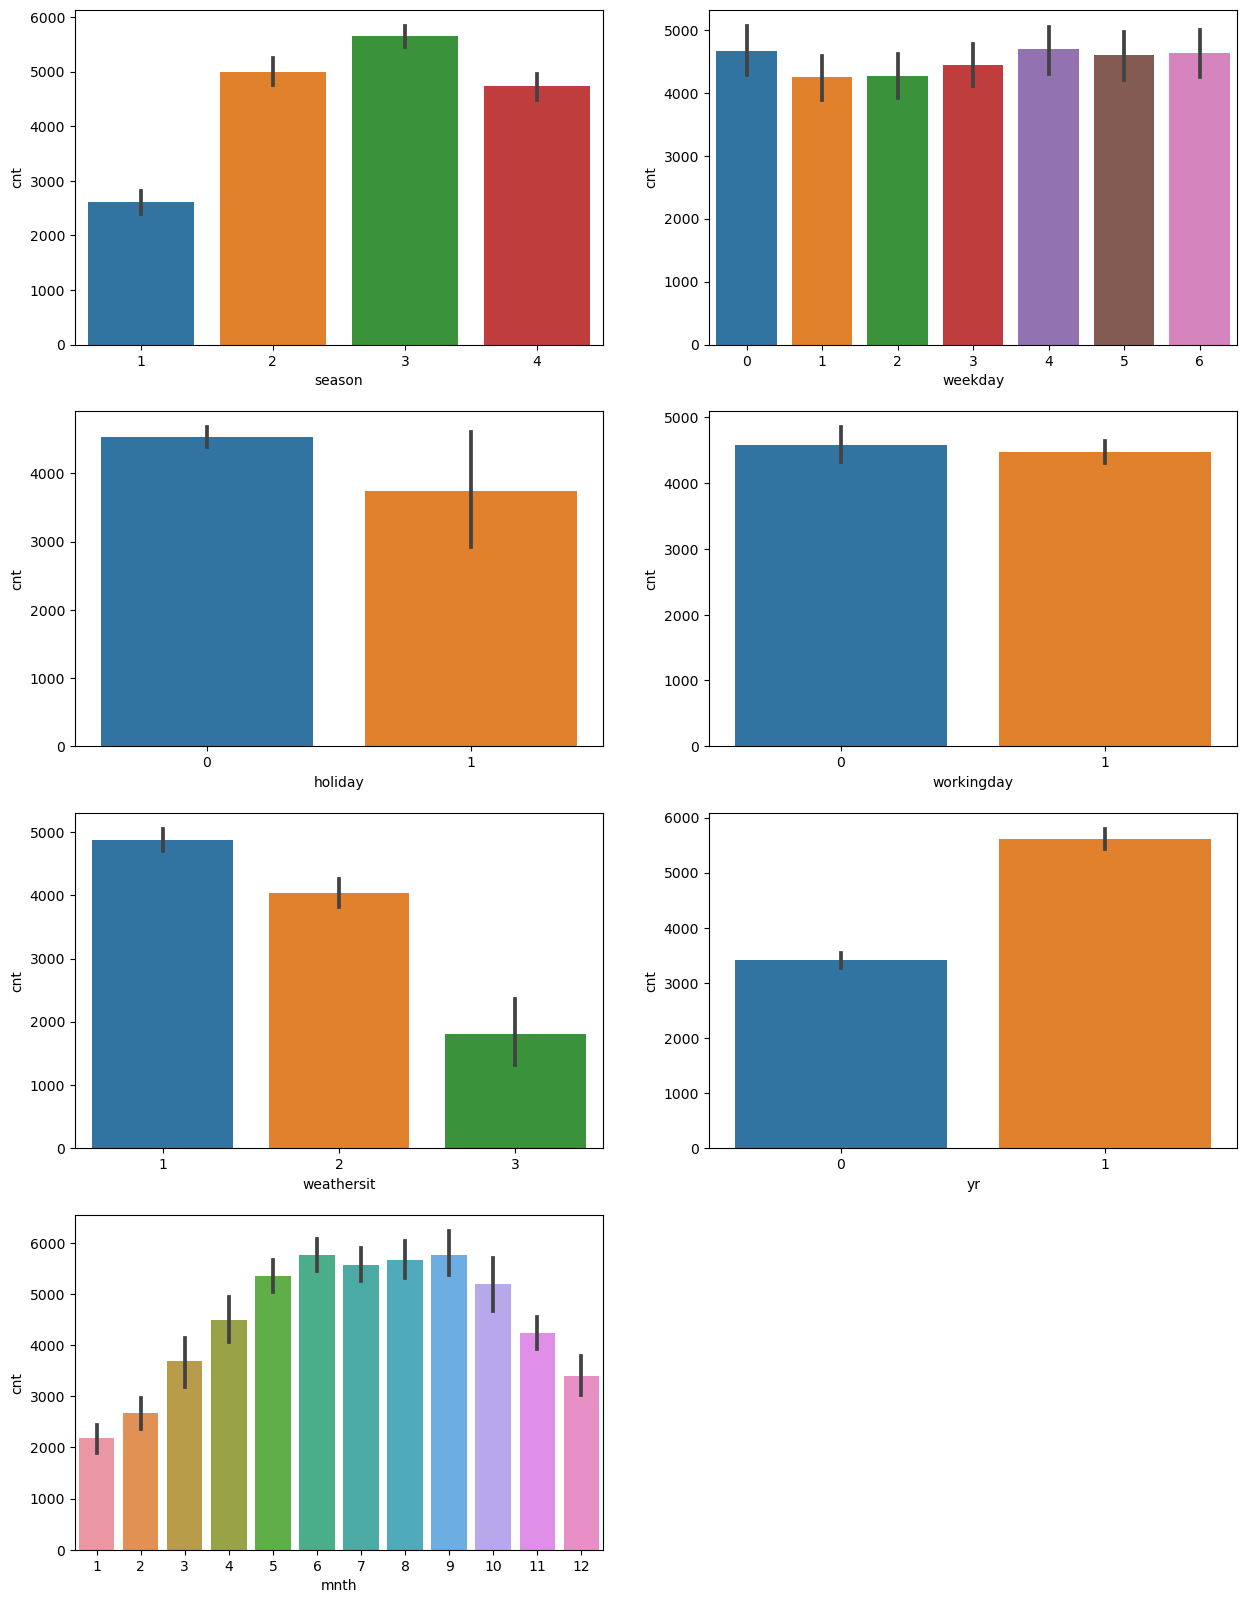

In [22]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', data = df2)
plt.subplot(4,2,2)
sns.barplot(x = 'weekday', y = 'cnt', data = df2)
plt.subplot(4,2,3)
sns.barplot(x = 'holiday', y = 'cnt', data = df2)
plt.subplot(4,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = df2)
plt.subplot(4,2,5)
sns.barplot(x = 'weathersit', y = 'cnt', data = df2)
plt.subplot(4,2,6)
sns.barplot(x = 'yr', y = 'cnt', data = df2)
plt.subplot(4,2,7)
sns.barplot(x = 'mnth', y = 'cnt', data = df2)
plt.show()

* The no of bookings increase month by month but it becomes less
* as derived before yr, 2019 has highest bookings
* when the weather was clear has the highest bookings
* when the weather was snowy has the lowest bookings
* During Fall season, bookings were high

<Figure size 1000x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='atemp'>

<Axes: >

<Axes: xlabel='temp'>

<Axes: >

<Axes: xlabel='windspeed'>

<Axes: >

<Axes: xlabel='hum'>

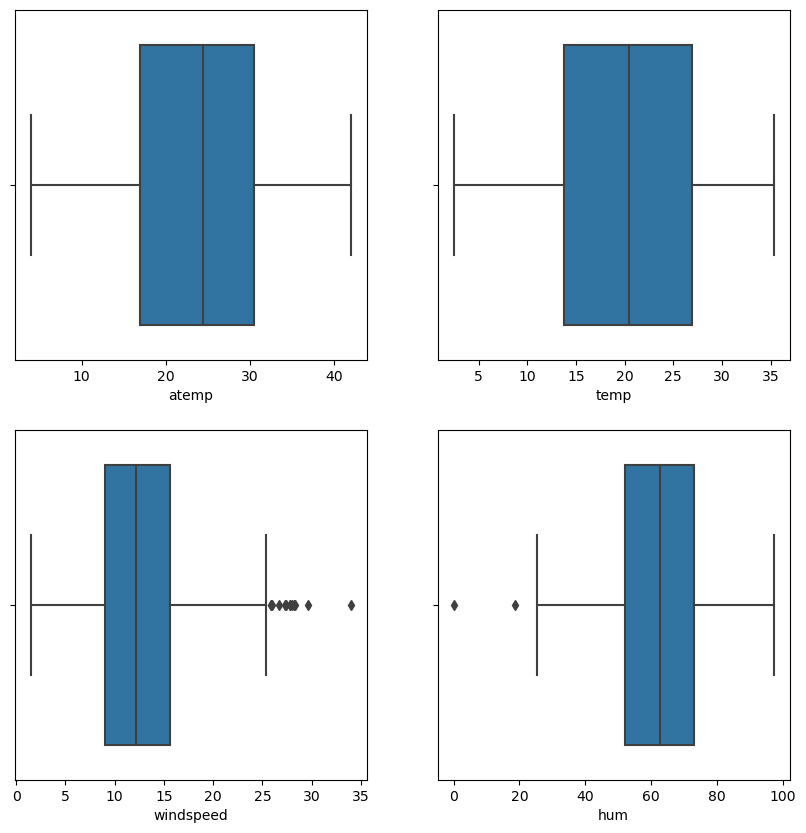

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'atemp', data = df2)
plt.subplot(2,2,2)
sns.boxplot(x = 'temp', data = df2)
plt.subplot(2,2,3)
sns.boxplot(x = 'windspeed', data = df2)
plt.subplot(2,2,4)
sns.boxplot(x = 'hum', data = df2)
plt.show()

There are some outliers in windspeed and hum, but seem to be very less number of outliers

### Heatmap for correlation between numeric variables

<Figure size 1500x1000 with 0 Axes>

<Axes: >

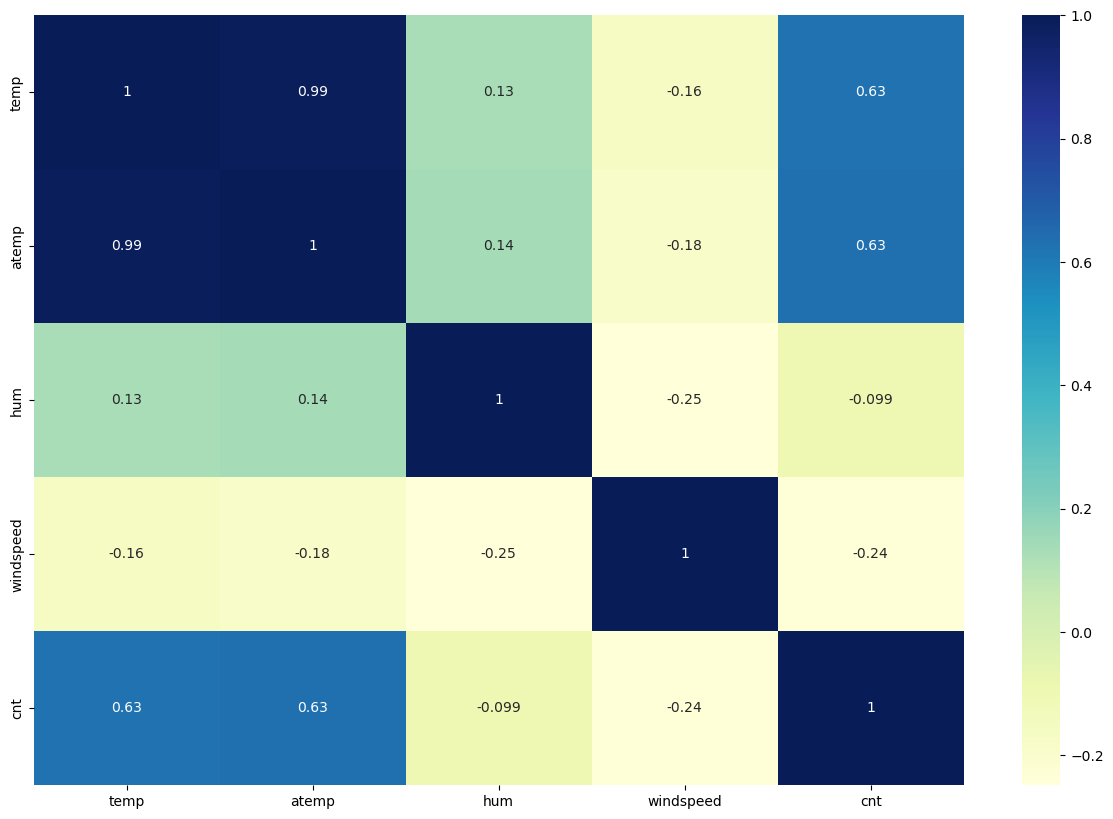

In [27]:
numeric_columns = df2.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
sns.heatmap(df2[numeric_columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='season', ylabel='cnt'>

<Axes: >

<Axes: xlabel='yr', ylabel='cnt'>

<Axes: >

<Axes: xlabel='mnth', ylabel='cnt'>

<Axes: >

<Axes: xlabel='weekday', ylabel='cnt'>

<Axes: >

<Axes: xlabel='workingday', ylabel='cnt'>

<Axes: >

<Axes: xlabel='weathersit', ylabel='cnt'>

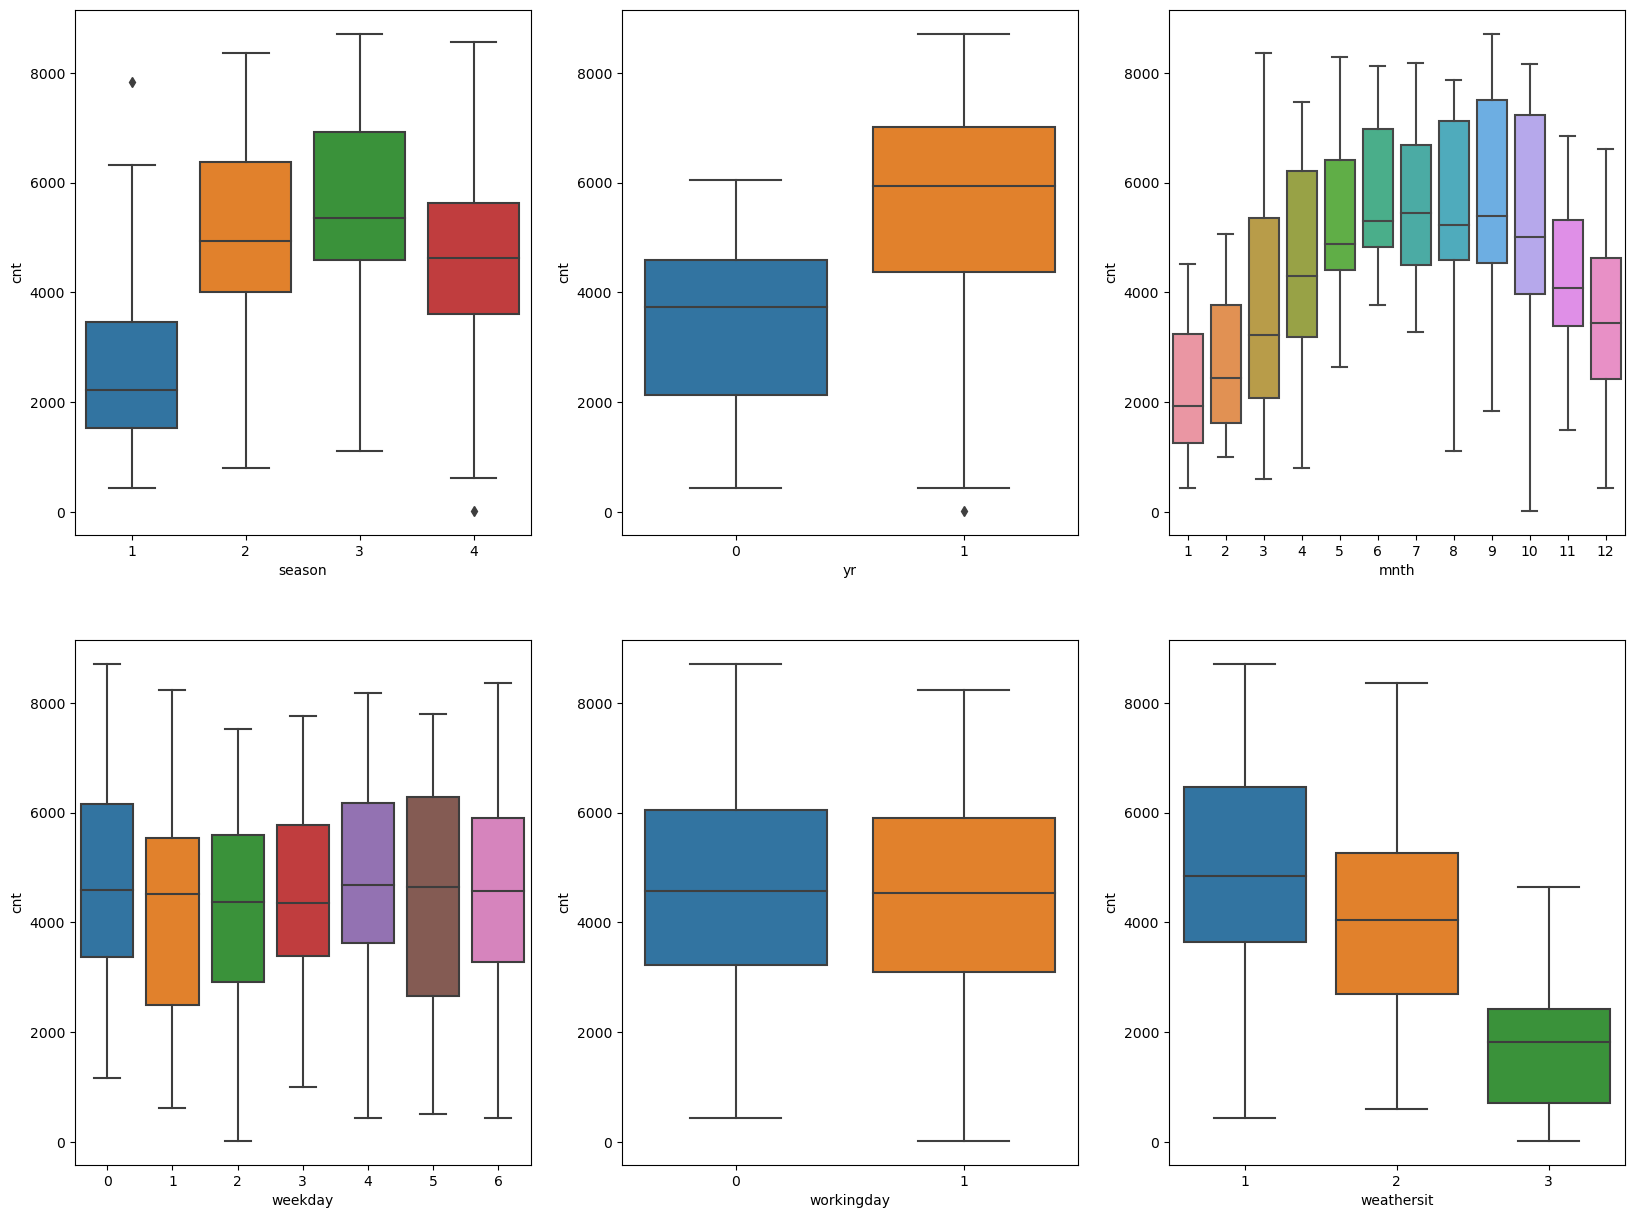

In [28]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df2)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df2)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df2)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df2)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df2)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df2)

<Figure size 1950x1040 with 0 Axes>

Text(0.5, 1.0, 'Correlation betweeen numeric features')

<Axes: title={'center': 'Correlation betweeen numeric features'}>

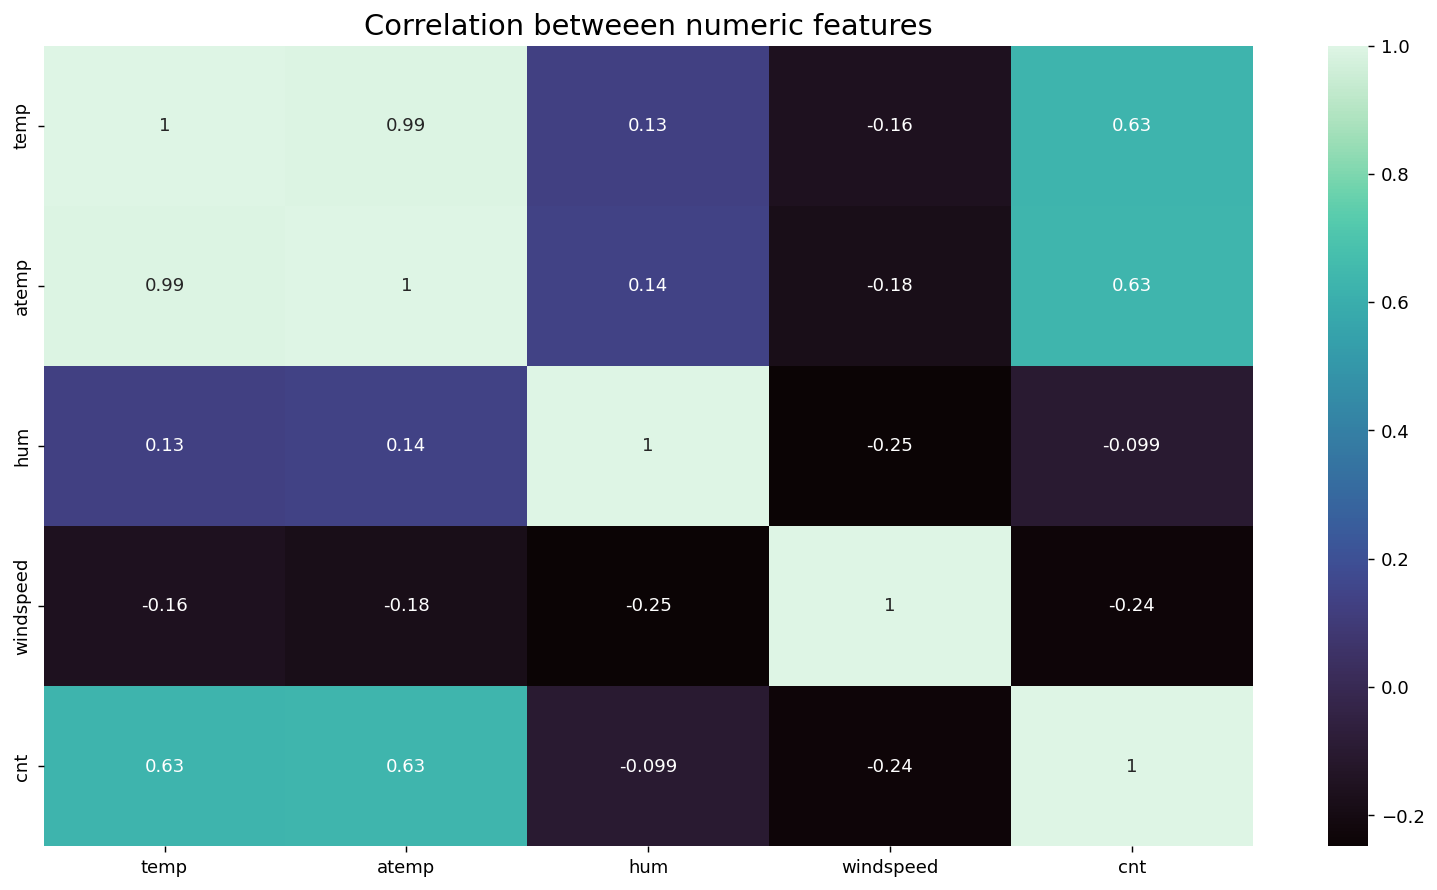

In [29]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(df2[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [30]:
df2.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Encoding the categorical variables

In [31]:
for i in categorical_vars:
    df1[i].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

weekday
1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: count, dtype: int64

holiday
0    709
1     21
Name: count, dtype: int64

workingday
1    504
0    226
Name: count, dtype: int64

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

yr
0    365
1    365
Name: count, dtype: int64

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Variables to be encoded are: 
1. mnth
2. weathersit
3. season
4. weekday

In [32]:
# As we saw before during visualisation, Fall is important as it has highest amount of bookings,
# so to lose the danger of dropping Fall, will encode it seperately

# Encoding 3 variables, weekday, weathersit, mnth
cat_encoded_df = pd.get_dummies(df1[['weekday', 'weathersit', 'mnth']], drop_first=True)

# Now, encoding season
season_encoded_df = pd.get_dummies(df1['season'])
season_encoded_df = season_encoded_df[[2,3,4]]
season_encoded_df.columns = ['Summer', 'Fall', 'Winter']

# Concatenating the both dataframes
cat_encoded_df = pd.concat([cat_encoded_df, season_encoded_df],axis=1)

In [33]:
# As we have encoded the variables, we are going to drop the 4 variables
df1.drop(['weekday', 'weathersit', 'mnth', 'season'], axis=1, inplace=True)

In [34]:
# concatenating encoded dataframe with original dataframe
df1 = pd.concat([df1, cat_encoded_df], axis=1)

In [35]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,Summer,Fall,Winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Feature Scaling

In [36]:
# Feature Scaling should be done after splitting data in order to avoid data breach. 
# So we are going to divide the dataframe into train and test data
df_train, df_test = train_test_split(df1, test_size=0.25, random_state = 100)

In [37]:
# Scaling the data in training data
scaler = MinMaxScaler()
df_train[continuous_vars] = scaler.fit_transform(df_train[continuous_vars])

df_train[continuous_vars].head()

,temp,atemp,hum,windspeed
311,0.435124,0.437339,0.743667,0.057471
523,0.735215,0.680985,0.482181,0.286093
381,0.391151,0.374375,0.737917,0.659615
413,0.358285,0.362754,0.550880,0.319514
253,0.740406,0.695906,0.735509,0.156398


### Building the model

<Figure size 1500x1500 with 0 Axes>

<Axes: >

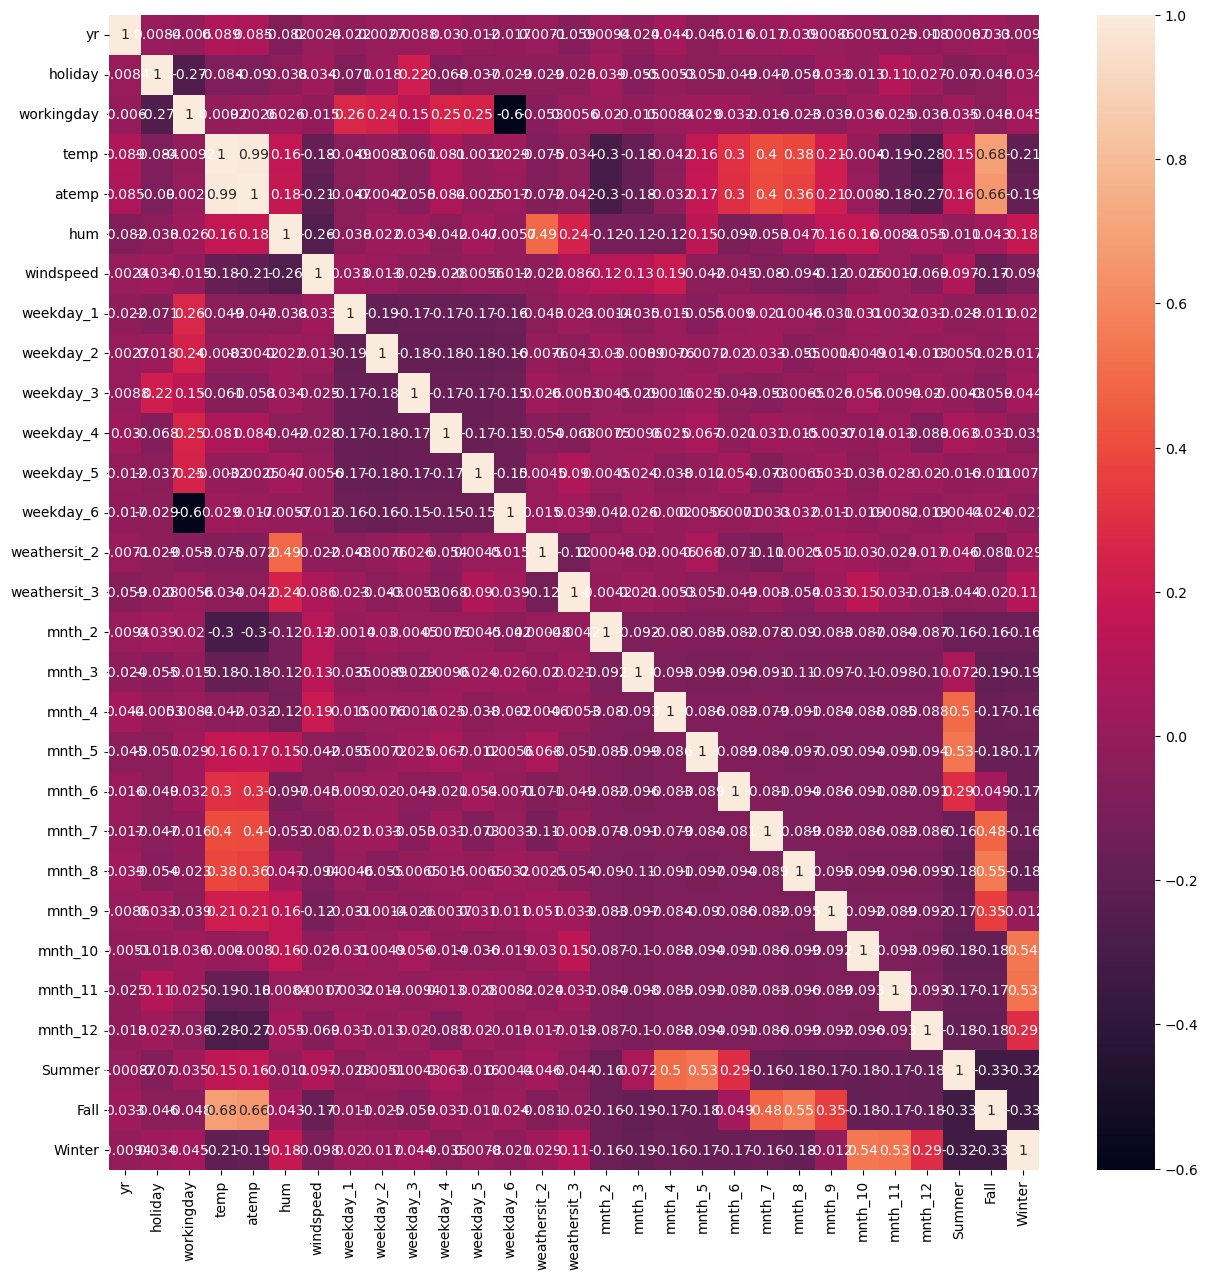

In [40]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [41]:
# We are going to use RFE for feature elimination 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [42]:
y_train = df_train.cnt
X_train = df_train.drop('cnt', axis=1)
# Initialize RFE with 18 features to select
rfe = RFE(estimator=lr, n_features_to_select=18)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [43]:
# Finding the dataframe with variables, support, ranking in order to eliminate the variables
pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_), columns = ['Columns', 'Support', 'Ranking'])[rfe.support_]

,Columns,Support,Ranking
0,yr,True,1
1,holiday,True,1
3,temp,True,1
4,atemp,True,1
5,hum,True,1
6,windspeed,True,1
13,weathersit_2,True,1
14,weathersit_3,True,1
16,mnth_3,True,1
17,mnth_4,True,1


In [44]:
columns = X_train.columns[rfe.support_]

**With the columns we have extracted with the help of RFE we are going to build our first model**

## Linear Model 1

In [45]:
X_train_sm = X_train[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr1 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.74e-203
Time:                        12:05:25   Log-Likelihood:                -4403.9
No. Observations:                 547   AIC:                             8846.
Df Residuals:                     528   BIC:                             8928.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1975.6733    230.091      8.586   

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [47]:
vif

,Features,VIF
3,temp,63.93
4,atemp,57.62
0,const,48.52
17,Fall,6.43
16,Summer,5.77
11,mnth_5,3.48
10,mnth_4,3.07
12,mnth_6,2.49
18,Winter,2.43
5,hum,1.98


## Removing the variable atemp as it has 0.817 p value

Temp has the highest vif at this time but p value precendence comes first so removing atemp variable

In [48]:
columns = list(X_train_sm.columns)

## Linear Model 2

In [49]:
columns.remove('atemp')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr2 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.10e-204
Time:                        12:05:47   Log-Likelihood:                -4403.9
No. Observations:                 547   AIC:                             8844.
Df Residuals:                     529   BIC:                             8921.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1977.7869    229.705      8.610   

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [51]:
vif

,Features,VIF
0,const,48.44
16,Fall,6.39
15,Summer,5.77
3,temp,4.43
10,mnth_5,3.48
9,mnth_4,3.06
11,mnth_6,2.48
17,Winter,2.42
4,hum,1.97
12,mnth_8,1.85


## Removing mnth_4 variable because of it's p value. 

## Linear Model 3

In [52]:
columns.remove('mnth_4')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr2 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.49e-205
Time:                        12:06:10   Log-Likelihood:                -4405.1
No. Observations:                 547   AIC:                             8844.
Df Residuals:                     530   BIC:                             8917.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2002.0755    229.373      8.728   

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,48.19
15,Fall,6.39
3,temp,4.40
14,Summer,2.90
16,Winter,2.39
4,hum,1.96
9,mnth_5,1.87
11,mnth_8,1.80
10,mnth_6,1.61
6,weathersit_2,1.58


## Removing the variable mnth_5 because of it's p value

## Linear Model 4

In [54]:
columns.remove('mnth_5')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr3 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.22e-205
Time:                        12:06:25   Log-Likelihood:                -4406.5
No. Observations:                 547   AIC:                             8845.
Df Residuals:                     531   BIC:                             8914.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1960.3956    228.356      8.585   

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,47.61
14,Fall,6.10
3,temp,4.01
13,Summer,2.66
15,Winter,2.33
4,hum,1.95
10,mnth_8,1.78
6,weathersit_2,1.58
12,mnth_10,1.56
11,mnth_9,1.45


## Have to remove mnth_6 because of it's p value

## Linear Model 5

In [56]:
columns.remove('mnth_6')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr4 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.13e-206
Time:                        12:06:41   Log-Likelihood:                -4406.8
No. Observations:                 547   AIC:                             8844.
Df Residuals:                     532   BIC:                             8908.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1969.3368    228.003      8.637   

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,47.50
13,Fall,6.06
3,temp,3.65
12,Summer,2.66
14,Winter,2.31
4,hum,1.90
9,mnth_8,1.70
6,weathersit_2,1.57
11,mnth_10,1.55
10,mnth_9,1.42


## Removing mnth_3 because of it's p value

## Linear Model 6

In [47]:
columns.remove('mnth_3')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr5 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          7.47e-207
Time:                        10:51:11   Log-Likelihood:                -4409.2
No. Observations:                 547   AIC:                             8846.
Df Residuals:                     533   BIC:                             8907.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2041.2223    226.337      9.019   

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,47.50
13,Fall,6.06
3,temp,3.65
12,Summer,2.66
14,Winter,2.31
4,hum,1.90
9,mnth_8,1.70
6,weathersit_2,1.57
11,mnth_10,1.55
10,mnth_9,1.42


## Removing Fall because of it's high VIF value

## Linear Model 7

In [59]:
columns.remove('Fall')

X_train_sm = X_train_sm[columns]
X_train_sm = sm.add_constant(X_train_sm)
lr6 = sm.OLS(y_train, X_train_sm.astype(float)).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.81e-207
Time:                        12:07:05   Log-Likelihood:                -4408.7
No. Observations:                 547   AIC:                             8845.
Df Residuals:                     533   BIC:                             8906.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1965.7301    228.589      8.599   

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,47.49
4,hum,1.87
13,Winter,1.78
3,temp,1.64
6,weathersit_2,1.57
11,mnth_10,1.52
9,mnth_8,1.47
12,Summer,1.40
10,mnth_9,1.26
7,weathersit_3,1.23


### Now we move on to Predictions, So we are going to scale the dataframe with test data and start predicting with latest linear model

In [61]:
scaler = MinMaxScaler()
df_test[continuous_vars] = scaler.fit_transform(df_test[continuous_vars])

df_test[continuous_vars].head()

,temp,atemp,hum,windspeed
184,0.837241,0.778767,0.534223,0.149393
535,0.911423,0.855132,0.470417,0.231142
299,0.496221,0.492359,0.777843,0.443398
221,0.890387,0.805661,0.236659,0.449707
152,0.821739,0.749249,0.070765,0.682387


In [62]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test = X_test[columns]

### To evaluaate the model, we are going to check the r2 score and then we will plot a distribution plot for error terms

In [63]:
y_pred = lr6.predict(X_test)
r2_score(y_test, y_pred)

0.7840610079328921

In [64]:
n = 183
k = 12
R2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-R2)*(n-1)/(n-k-1))
adj_r2

0.7688182555516845

In [65]:
X_test.shape

(183, 14)

<Axes: ylabel='Density'>

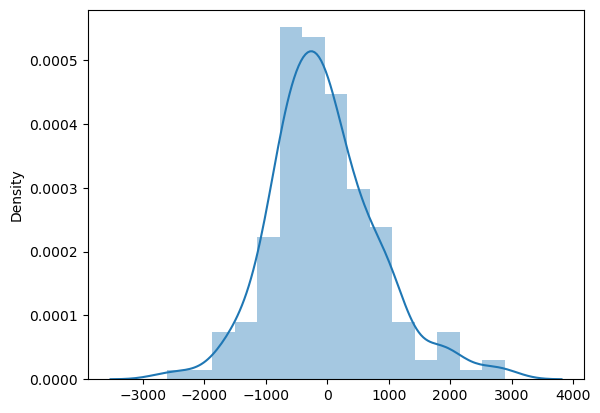

In [56]:
sns.distplot(y_pred - y_test)
plt.show()

Clearly the error terms are in normal distribution, which aligns with the assumption of the linear model

<Axes: ylabel='cnt'>

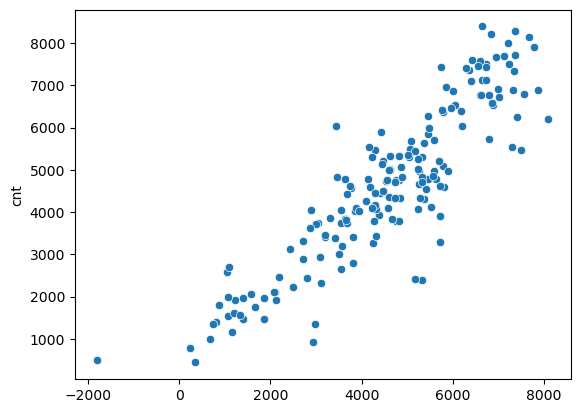

In [66]:
sns.scatterplot(x = y_pred,y = y_test)

The variance of the residuals is less which aligns with rule of homoscedasticity 

In [67]:
lr6.params.shape

(14,)

<Figure size 1500x800 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Coefficient Values')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Feature Coefficients')

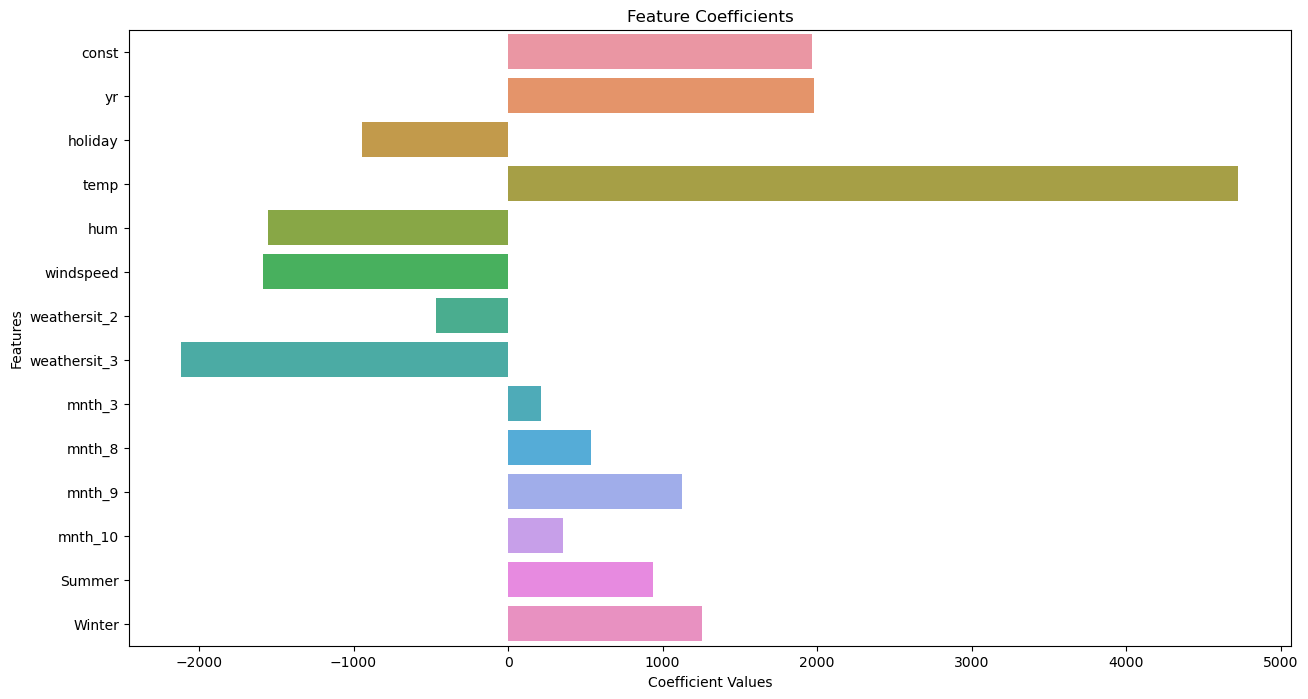

In [68]:
plt.figure(figsize=(15, 8))
sns.barplot(x=lr6.params.values, y=lr6.params.index)
plt.xlabel("Coefficient Values")
plt.ylabel("Features")
plt.title("Feature Coefficients")
plt.show()

The most effecting variables for the model are:
1. Temp
2. Year
3. Winter